# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 7**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy and Pyplot.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

# Writing efficient Numpy code

## Colon (:) notation
In this section we give an introduction to indexing in Numpy. For further information see https://numpy.org/doc/stable/user/basics.indexing.html. 

By using colon (:) notation you can manipulate entire subblocks of vectors and matrices without having to write a for loop. Let's define a vector first




In [2]:
vec1 = np.array( [ 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120 ] )

Using square brackets we can, of course, access the individual elements of this array. For example, to access the fourth element (in human language) we write

In [3]:
vec1[3]   # As you know, Python indexing starts at 0

40

Frequently we want to manipulate a range of values of a vector, or a block of values of a matrix. For these scenarios, there is colon indexing. For example, to assign elements $2, 3, 4, 5$ of `vec1` to a new vector `vec2`, we write

In [4]:
# Get elements 2 to 5 from vec1 and put it in vec2
vec2 = vec1[2:6]
print(vec2)

[30 40 50 60]


This extends to matrices. For example, if we have a $5 \times 5$ matrix $A$ and we want to change a subblock of this matrix this can be done as follows


In [5]:
# A 5x5 matrix of zeros
A = np.zeros( (5,5) )
print('Initial choice of A: \n', A)

# Change a 2x2 subblock of A 
A[2:4, 2:4] = np.array([[1,2],[11,12]])
print('A after modifying a subblock: \n',A)

Initial choice of A: 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
A after modifying a subblock: 
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  2.  0.]
 [ 0.  0. 11. 12.  0.]
 [ 0.  0.  0.  0.  0.]]


There are many more possibilities with the Numpy colon notation, of which we mention a few:

In [6]:
# a stepsize can be introduced using the notation start:stop:step
print('every second element: ', vec1[0:12:2])

# in the notation start:stop, omitting the start value means "start from 0"
print('first three values: ', vec1[:3])

# negative numbers mean "count from the end"
print('last three values: ', vec1[-3:])

# a single colon means "all values"
print('all values: ', vec1[:])

# Example: the following changes the values in the existing array vec1
# It does not allocate a new array, like with vec1 = np.ones(...)
vec1[:] = 1.0

print('all values: ', vec1[:])

every second element:  [ 10  30  50  70  90 110]
first three values:  [10 20 30]
last three values:  [100 110 120]
all values:  [ 10  20  30  40  50  60  70  80  90 100 110 120]
all values:  [1 1 1 1 1 1 1 1 1 1 1 1]


## Performance advantage of vector operations

We just saw how to easily manipulate subblocks of vectors and matrices using colon indexing. This generally makes sense for short code. Without colon indexing, the one-line manipulations above would require a for loop and hence multiple lines of code.

Numpy also has many other convenient functions that replace for loops. For example, by using the function numpy.sum you can sum all the elements of a vector without writing a Python for loop. There are many more examples of this coding style, which is called vectorization (replacing for loops by vector commands).

Not only does it make for short code, vectorized code is often also much faster.
This is because Python is in general a slow language, much slower than for example C. Each line incurs a certain overhead[^1]. Numpy operations are basically calls to C code that perform the vector manipulations efficiently. When executing a vector operation with colon notation, the Python overhead is incurred only once. On the other hand, when executing a Python loop, the Python overhead is incurred each time the code in the loop is executed. Therefore using vector operations with colon notation is generally preferred.

[^1]: A full discussion of this is outside the scope of this course.

### Example: Matrix multiplication

Here we present a short demo showcasing *how much* faster vectorized operations actually are. We will write two versions of a function that computes a matrix product `C` of two matrices `A` and `B`. We will use the [`%timeit`](https://stackoverflow.com/questions/29280470/what-is-timeit-in-python) macro to investigate the performance of each version.

In the first version of our function we have three `for` loops. We iterate over each entry in matrix `C` and compute it using another `for` loop, which sums up all the products of corresponding entries in row `i` in matrix `A` and column `j` in matrix `B`.

Compute, on paper, the matrix product below and convince yourself that the following implementation is correct. 
$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
\end{bmatrix}
\times
\begin{bmatrix}
10 & 11 \\
20 & 21 \\
30 & 31 \\
\end{bmatrix}
= \mathord{?}
$$

In [7]:
A = np.array([[1,2,3],[4,5,6]], dtype=int)
B = np.array([[10,11],[20,21],[30,31]], dtype=int)

In [8]:
def slow_matmul(A, B, C):
    """
    Computes the matrix product of matrices A and B and stores it in matrix C
    """    
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            C[i, j] = 0
            for k in range(A.shape[1]):
                C[i, j] += A[i,k] * B[k,j]

In [9]:
C = np.zeros((A.shape[0], B.shape[1]), dtype=int)

slow_matmul(A, B, C)
print(C)

[[140 146]
 [320 335]]


In the second version we replace the third `for` loop with a vectorized `np.sum()`. In fact, we use two vectorized operations here. Notice how we efficiently compute all the products of corresponding entries `A` and  `B`. By calling `A[i] * B[:, j]` we compute all the products at once, instead of doing it one-by-one as in the previous version. Look at the code and convince yourself that the implementation is correct.

In [10]:
def faster_matmul(A, B, C):
    """
    Computes the matrix product of matrices A and B and stores it in matrix C
    """  
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            C[i, j] = np.sum(A[i] * B[:, j])

In [11]:
A = np.array([[1,2,3],[4,5,6]], dtype=int)
B = np.array([[10,11],[20,21],[30,31]], dtype=int)
C = np.zeros((A.shape[0], B.shape[1]), dtype=int)

faster_matmul(A, B, C)
print(C)

[[140 146]
 [320 335]]


Now we will compare the performance of both versions by computing the matrix product of two $200 \times 200$ matrices. You can rerun the cells yourself, but keep in mind the execution might take a minute or two for the `slow_matmul` implementation.

In [12]:
A = np.random.randint(0, 100, (200, 200), dtype=int)
B = np.random.randint(0, 100, (200, 200), dtype=int)

In [13]:
C = np.zeros((A.shape[0], B.shape[1]), dtype=int)

%timeit slow_matmul(A, B, C)

4.2 s ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
A = np.random.randint(0, 100, (200, 200), dtype=int)
B = np.random.randint(0, 100, (200, 200), dtype=int)
C = np.zeros((A.shape[0], B.shape[1]), dtype=int)

%timeit faster_matmul(A, B, C)

181 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


On my machine `slow_matmul` ran on average 3.2 s ± 23 ms and `faster_matmul` ran on average 172 ms ± 4.42 ms, meaning that `faster_matmul` was more than $18$ times faster.

Of course, you might already know this, but you should never write your own implementation of matrix multiplication (unless we specifically ask for it). The demo presented above was for illustrative purposes.

The most efficient way to multiply two matrices using Numpy is to use `@` operator which calls the `np.matmul` function.

In [15]:
%timeit A @ B

4.73 ms ± 43.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


On my machine `A @ B` needed, on average, 9.9 ms ± 151 μs to execute meaning that it is more than $323$ times faster than `slow_matmul` and $17$ times faster than `faster_matmul`.

---

# Exercise 1

Suppose $x_1$ and $x_2$ are two real numbers and that approximate values $\hat{x}_1$ and $\hat{x}_2$ are available such that the relative errors satisfy
$\frac{ | \Delta x_1 | }{ | x_1 | } \le r_1$
and 
$\frac{ | \Delta x_2 | }{ | x_2 | } \le r_2$
for two real numbers $r_1$ and $r_2$. 
What is the bound for the relative error in the product $\hat{x}_1 \hat{x}_2$?




*( Your solution goes here, note that this is not a coding excercise )*

---

# Exercise 2

Solve computational exercise 2.3 from Heath (page 99) using your own implementation of LU decomposition with partial pivoting and of back- and forward substitution. Also read carefully the derivation of the matrix for use in the next exercise.

As you noticed, there is a short section on colon (:) notation and vectorization in Numpy at the start of this homework set. In the LU decomposition there are a few places where for loops can easily be replaced by vectorized commands. You are asked to use vectorized operations and colon notation in these cases. The same holds for forward and backward substitution.

Please first implement the functions for which the headers are in the next cell. Then apply these to solve the problem at hand.

In [ ]:
def factorize(A):
    '''
    returns a triple (P,L,U) describing the LU decomposition with partial pivoting
    
    ```
    P A = L U
    ```
    '''
    # print(f"Before: \n{A = }")
    n = A.shape[0]
    P = np.identity(n)
    M = np.identity(n)
    U = np.copy(A)

    for k in range(0, n-1):
        pivot_index = np.argmax(U[k:, k]) + k
        if not pivot_index == k:
            U[[k, pivot_index]] = U[[pivot_index, k]]
            P[[k, pivot_index]] = P[[pivot_index, k]]
            M[[k, pivot_index]] = M[[pivot_index, k]]
            
        akk = U[k, k]
        if akk == 0:
            continue
        m_matrix = np.identity(n)
        m_matrix[k+1:, k] = - U[k+1:, k] / akk
        # print(f"{m_matrix = }")
        # first_row_matrix = np.zeros_like(A[k+1:k])
        # first_row_matrix[:] = A[k]
        # print(f"{first_row_matrix = }")
        # A[k+1:k] = A[k+1:k] - first_row_matrix * m_array
        U = m_matrix @ U
        M = m_matrix @ M
    # print(f"After : \n{U = }") 
    L = P @ np.linalg.inv(M)
    # print(f"{L = }")

    return P, L, U

def forwardSubstitution(L, b):
    '''
    your doc string here
    '''
    # your code here

def backwardSubstitution(U, b):
    '''
    your doc string here
    '''
    # your code here

In [119]:
test_matrix = np.array([
    [1, 2, 3, 4],
    [9, 8, 7, 6],
    [4, 3, 0, 4],
    [5, 0, 1, 2]
])
# test_matrix = np.array([
#     [1, 2, 3, 4],
#     [9, 8, 7, 6],
#     [4, 3, 1, 4],
#     [5, 1, 1, 2]
# ])
# test_matrix = np.array([
#     [1,         1.11111111, 2.22222222, 3.33333333],
#     [0,         0.,         0.,         5.25      ],
#     [0,         4.,         4.,         9.        ],
#     [9,         8.,         7.,         6.        ],
# ])
P, L, U = factorize(test_matrix)
# example_matrix = np.array([
#     [1, 2, 2],
#     [4, 4, 2],
#     [4, 6, 4],
# ])
# P, L, U = factorize(example_matrix)
correct = lu(test_matrix)
print(f"P = \n{P}\nCorrect P = \n{np.linalg.inv(correct[0])}\nL = \n{L}\nCorrect L = \n{correct[1]}\nU = \n{U}\nCorrect U = \n{correct[2]}")
# print()
# print(f"P @ test_matrix = \n{P @ test_matrix}")
# print(f"L @ U = \n{L @ U}")
assert np.allclose(P @ test_matrix, L @ U)
print(f"{np.linalg.inv(P) @ L @ U}")
assert np.allclose(test_matrix, np.linalg.inv(P) @ L @ U), f"{np.linalg.inv(P) @ L @ U}"


P = 
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Correct P = 
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
L = 
[[ 1.          0.          0.          0.        ]
 [ 0.11111111  1.          0.          0.        ]
 [ 0.55555556 -4.          1.          0.        ]
 [ 0.44444444 -0.5        -0.33333333  1.        ]]
Correct L = 
[[ 1.          0.          0.          0.        ]
 [ 0.55555556  1.          0.          0.        ]
 [ 0.44444444  0.125       1.          0.        ]
 [ 0.11111111 -0.25       -0.54545455  1.        ]]
U = 
[[ 9.          8.          7.          6.        ]
 [ 0.          1.11111111  2.22222222  3.33333333]
 [ 0.          0.          6.         12.        ]
 [ 0.          0.          0.          7.        ]]
Correct U = 
[[ 9.          8.          7.          6.        ]
 [ 0.         -4.44444444 -2.88888889 -1.33333333]
 [ 0.          0.         -2.75        1.5       ]
 [ 0.          0.          0.          3.81818182]]
[[1.

---

# Exercise 3

In exercise 2, you were asked to solve exercise 2.3 from Heath. In this assignment you are asked to create a program that automatically creates the equations for the forces in the truss.

We first need a description of a truss. A simple way of doing this is by giving the coordinates of the joints and then list the pairs of joints that are connected, as follows:

In [18]:
# coordinates of joints
joints1 = [ (0,0), (1,0), (1,1), (2,1), (2,0), (3,0), (3,1), (4,0) ] 

# pairs indicating which joints are connected
members1 = [ (0,2), (0,1), (1,2), (2,3), (2,4), (1,4), 
         (3,4), (3,6), (4,6), (4,5), (5,6), (6,7), (5,7) ]

To check this input, we plot it

In [19]:
def DrawTruss(joints, members):
    xx = [ p[0] for p in joints ]
    yy = [ p[1] for p in joints ]
    plt.scatter(xx,yy,color='r')
    for (j,p) in enumerate(joints):
        plt.text(p[0]+0.03,p[1],f"{j}")
    for (jA, jB) in members:
        xxMember = np.array( [joints[i][0] for i in (jA,jB) ] )
        yyMember = np.array( [joints[i][1] for i in (jA,jB) ] )
        plt.plot(xxMember, yyMember, 'b')


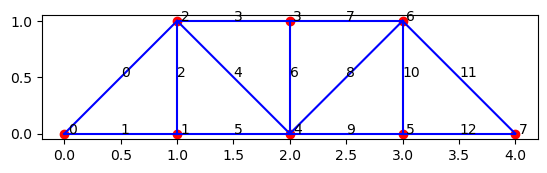

In [125]:
(fig, ax) = plt.subplots()
DrawTruss(joints1, members1)
ax.set_aspect(1.0)

## (a)

Modify `DrawTruss` such that the routine can draw the numbers of the members in the graph halfway each member.

In [150]:
def DrawTruss(joints, members):
    xx = [ p[0] for p in joints ]
    yy = [ p[1] for p in joints ]
    plt.scatter(xx,yy,color='r')
    for (j,p) in enumerate(joints):
        plt.text(p[0]+0.03,p[1],f"{j}")
    for index, (jA, jB) in enumerate(members):
        xxMember = np.array( [joints[i][0] for i in (jA,jB) ] )
        yyMember = np.array( [joints[i][1] for i in (jA,jB) ] )
        plt.text((((joints[jA][0] + joints[jB][0]) / 2)),((joints[jA][1] + joints[jB][1]) / 2),f"{index+1}", fontsize=10)
        plt.plot(xxMember, yyMember, 'b')

## (b)

Study how in exercise 2.3 the equations for the forces are derived.
Then write a routine to compute the corresponding matrix automatically from the information above, so arrays like `joints1` and `members1`.

You may have noticed that joint 1 and the $y$ component of joint 8 are not included in the equations of exercise 2.3. This is because joint 1 is rigidly fixed and joint 8 is fixed vertically. 
It is recommended that you first include all joints, so also joint 1 and the $y$ component of joint 8 in the truss of exercise 2.3. In a separate step, you can select the matrix rows that are "free" (not fixed in one or both of the directions).

Create a vector with external forces (the downward arrows at joints 2, 5, 6 in exercise 2.3), and solve the system. 

Write the resulting force values in the graph of the truss near the appropriate members.

The forces in a member can be compressive (like they "push" the member to become shorter) or tension forces (like they pull the member to become longer).
Which member or members experience the largest compressive force? Which one experience the largest tension force?

(In general one would try to keep such maximum forces as low as possible since that would allow one to use less material.)


In [149]:
num_joints = len(joints1)
num_members = len(members1)
matrix = np.zeros((num_joints, num_members))

for member_index, (joint1, joint2) in enumerate(members1):
    x1, y1 = joints1[joint1]
    x2, y2 = joints1[joint2]

    dx = x2 - x1
    dy = y2 - y1

    if dx != 0 and dy != 0: 
        weight = np.sqrt(2) / 2
    else:
        weight = 1

    matrix[joint1, member_index] = weight
    matrix[joint2, member_index] = -weight

print(matrix)
transposed_matrix = matrix.T
print(matrix.shape)
Forces_vector = np.array([0,10,0,0,15,20,0,0])


#for verification, this is the system of equations imported manually
alpha = np.sqrt(2) / 2
Truss_Forces = np.array([
    [0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [alpha, 0, 0, -1, -alpha, 0, 0, 0, 0, 0, 0, 0, 0],
    [alpha, 0, 1, 0, alpha, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, alpha, 1, 0, 0, -alpha, -1, 0, 0, 0],
    [0, 0, 0, 0, alpha, 0, 1, 0, alpha, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, alpha, 0, 0, -alpha, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, alpha, 0, 1, alpha, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, alpha, 1]
])
Forces_vector_book = np.array([0,10,0,0,0,0,0,15,0,20,0,0,0])
solution = np.linalg.solve(transposed_matrix,Forces_vector)
print(solution)
x = np.linalg.solve(Truss_Forces,Forces_vector_book)
print(x)

[[ 0.70710678  1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         -1.          1.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.70710678  0.         -1.          1.          0.70710678  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.         -1.          0.          0.
   1.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.         -0.70710678 -1.
  -1.          0.          0.70710678  1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.         -1.          1.          0.
   1.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -1.         -0.70710678  0.         -1

LinAlgError: Last 2 dimensions of the array must be square